# MAP 631 Lab 7 - Generative Adversarial Networks (GANs)

J.B. Scoggins

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jbscoggi/teaching/blob/master/Polytechnique/MAP631/gan.ipynb) 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jbscoggi/teaching/master?filepath=Polytechnique%2FMAP631%2Fgan.ipynb)

The hand-written digits in the figure below appear to be scanned images of real digits written by humans, but they aren't.  In fact, these images were generated by a neural network that has been trained to create images that look like real hand-written digits.  This type of network is called a _Generative Adversarial Network_ or GAN. In this lab, you will create your own GAN which can produce images like the one below.

![](artwork/gan_mnist.png)

## A note on grading

This lab will be graded.  You have until midnight on Tuesday Nov. 26 to submit your completed notebooks to the class Moodle online.  Everywhere you see ```# TODO*``` in the notebook is a placeholder where you must write some code.  There are 14 in total, worth 1.5 points each, and the maximum score is 20 points.  A correctly coded snippet must satisfy the requested task and must run with no errors.

## Preliminaries

To get started, import the necessary modules and classes needed in the lab.  Apart from importing libraries, the code below also ensures that the random number generator used in the lab always gives the same results.  This can be very useful when testing your code to make sure that behavior is reproducable.  It will also ensure that I see the same output as you when I grade your work.  The last line of the code sets the size of the random noise array which will be explained later.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, LeakyReLU
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras import backend as K
from tensorflow.keras import initializers

# Ensures the same behavior between runs
np.random.seed(1000)

# Dimensionality of the hidden noise
random_dim = 10

### Load the MNIST dataset

We will use the MNIST dataset to train the GAN. You should be already familiar with this dataset from the previous lab.  

- Use Keras to load the MNIST data
- Normalize the x_train pixel data to [-1, 1]
- Reshape x_train to (60000, 784)

In [ ]:
# Load MNIST data
# TODO*
x_train = 

## Build the GAN

Let's recall from the lectures how a GAN works.  A GAN is composed of two competing (adversarial) networks.  The _generator_ network takes as input a random noise distribution vector and tries to output a distribution that matches the distribution of the data we want to match.  In our case, the distribution of data is represented by the set of MNIST training images.  Thus, the goal of our generator is to take a noise vector and output a fake image that looks like it was sampled from the MNIST dataset.  The second component of the GAN is the _discriminator_ network.  The role of the discriminator is to compute the probability that a given data sample comes from the real dataset or has been generated.

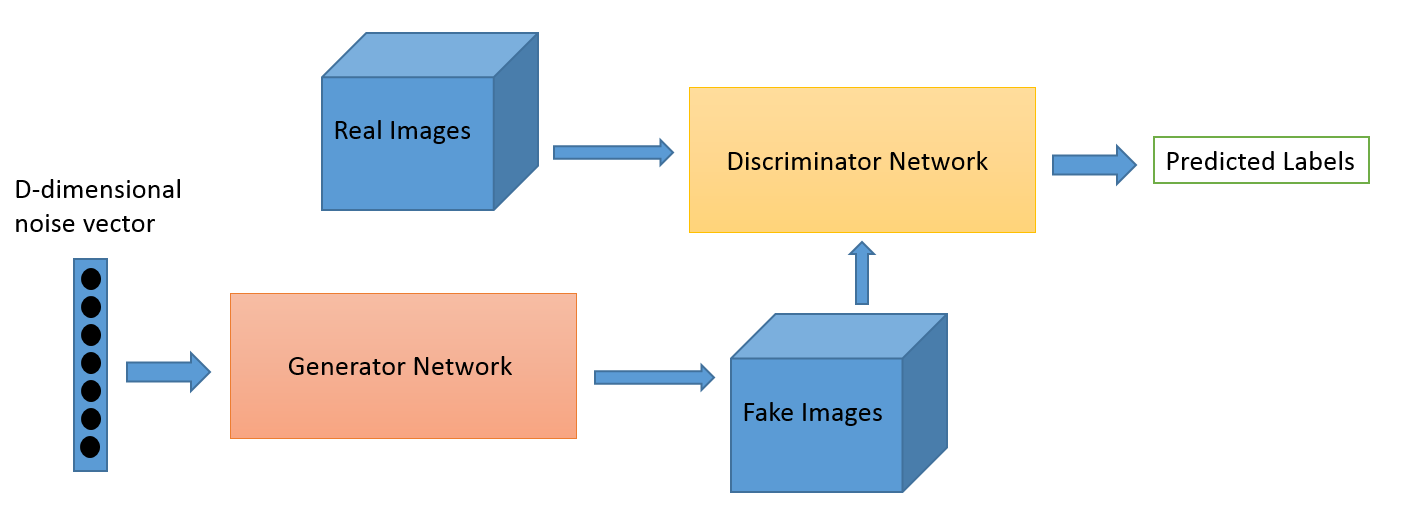

As we can see, the two networks have opposite goals.  The generator wants to trick the discriminator into believing that its generated images are indeed real.  As the generator improves its ability to generate realistic images, the discriminator must improve its ability to distinguish between real and fake images.  Likewise, as the discriminator improves, the generator must improve to keep beating the discriminator.  This is known as a [zero sum game](https://en.wikipedia.org/wiki/Zero-sum_game).  In the next 3 tasks, you will construct the generator and discriminator models, as well as an "adversarial" model which will be used to train the generator for a fixed discriminator.

### Generator network

Construct a generator network using a sequential model in Keras:
- Use the following layers to build your network
  - A dense layer with 256 nodes, initialize the kernal with normally distributed weights with zero mean and 0.02 standard deviation, Leaky ReLU activation with $alpha=0.2$
  - A dense layer with 512 nodes, Leaky ReLU activation with $alpha=0.2$
  - A dense layer with 1024 nodes, Leaky ReLU activation with $alpha=0.2$
  - Output dense layer with size of image (in 1D), hyperbolic tangent activation
- Compile the generator using binary crossentropy loss and the Adam optimizer with learning rate 0.0002 and $\beta_1 = 0.5$

In [ ]:
generator = Sequential()
# TODO*

### Discriminator network

Construct a discriminator network using a sequential model in Keras:
- Use the following layers to build the network
  - A dense layer with 1024 nodes, initialize the kernal with normally distributed weights with zero mean and 0.02 standard deviation, Leaky ReLU activation with $alpha=0.2$
  - Dropout layer with dropout ratio of 0.3
  - A dense layer with 512 nodes, Leaky ReLU activation with $alpha=0.2$
  - Dropout layer with dropout ratio of 0.3
  - A dense layer with 256 nodes, Leaky ReLU activation with $alpha=0.2$
  - Dropout layer with dropout ratio of 0.3
  - Dense output layer with sigmoid activation
- Compile the model with binary crossentropy loss and Adam optimizer

In [ ]:
discriminator = Sequential()
# TODO*

### Adversarial Network

Now that we have our generator and discriminator networks, we can form the GAN graph by creating another network using the functional API of Keras.

- Create a Keras Model that feeds a random noise tensor through the generator, the output of which is fed to the discriminator. Note: use discriminator.trainable = False before constructing the GAN network.
- Compile the GAN with binary cross-entropy loss and same Adam optimizer as before

In [ ]:
# Combined network
discriminator.trainable = False
# TODO*
gan = Model(inputs=gan_input, outputs=gan_output)
# TODO*

## Training

With the networks and data ready, the final step is to train the generator and discriminator models.  I have provided a skeleton of the training process to help get started.

For each epoch of training, implement the following:
1. Compute a normally-distributed (mean 0, variance 1) noise vector with shape = (batch_size, random_dim) which can be used as input to the generator.
2. Select a random sample of batch_size images from the training dataset.
3. Use the generator predict function to create batch_size fake images from the noise vectors.
4. Concatenate the samples of real and fake images to form a single array of size (2*batch_size, 784).
5. Construct the labels vector for these samples (2*batch_size).  Label the real images as 0 and the fake images as 0.9.  Using 0.9 instead of 1 to represent the probability is called label smoothing, which helps in the early training.
6. Use `train_on_batch` to perform one optimization step on the discriminator given the samples of images and labels.
7. Create another noise vector with shape = (batch_size, random_dim).
8. Create a labels vector with shape = (batch_size, 1) of all zeros.
9. Use `train_on_batch` to perform one optimization step on the gan model (with a frozen discriminator). This will train the underlying generator model.

Once you have implemented everything, run the cell.  If everything is working correctly, you will see examples of generated digits after each epoch of training.

In [ ]:
# Create a wall of generated MNIST images
def plot_generated_images(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, random_dim])
    images = generator.predict(noise)
    images = images.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def train(epochs=1, batch_size=128):
    batch_count = x_train.shape[0] / batch_size
    print( 'Epochs:', epochs )
    print( 'Batch size:', batch_size )
    print( 'Batches per epoch:', batch_count )

    for e in range(1, epochs+1):
        print( '-'*15, 'Epoch %d' % e, '-'*15 )
        for _ in range(int(batch_count)):
            # Train discriminator
            # TODO* 1.
            noise = 
            
            # TODO* 2.
            real_images = 

            # TODO* 3. 
            generated_images = 
            
            # TODO* 4.
            images = 

            # TODO* 5.
            labels = 

            discriminator.trainable = True
            # TODO* 6.
            
            # Train generator
            # TODO* 7.
            noise = 
            
            # TODO* 8.
            labels = 
            
            discriminator.trainable = False
            # TODO* 9.

        # Plot some generated images
        plot_generated_images(e)

    
train(20, 128)

## Extra

That's it for the graded part!  If you have more time and want to play with the model, you can try changing the architectures of the GAN models, or the hyperparameters for the training.  In particular, see how removing dropout in the discriminator, or using a hard label smoothing affects the result.  Happy coding.